In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from utils_eda import plot_boxplot, plot_histogram, plot_correlaction_matrix, scatter_plot

In [2]:
DATASET_PATH = "price-prediction/dataset/kc_house_data.csv"

# Load dataset

In [3]:
dataset_path_full = Path.cwd().parent.parent.joinpath(DATASET_PATH)
data = pd.read_csv(dataset_path_full, sep=",")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Descriptive statistics

Calculate descriptive statistics for the data columns, except for the columns ["id", "date"].

In [5]:
df_columns = data.columns.to_list()
columns_for_analysis = [x for x in df_columns if x not in ["id", "date"]]

data[columns_for_analysis].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Check for NaN values

There are not any NaN values.

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Convert datetime str column to datetime object and keep only date part

In [7]:
data["date"] = pd.to_datetime(data.date, format='%Y%m%dT%H%M%S')
data["date"] = data["date"].dt.date

## Check for duplicate id

There are 177 rows with duplicated "id" value.  
Check the duplicates.  More specifically 175 id values with 2 occurrences and 1 id value with 3 occurrences.  
The duplicated rows are dropped. They have the same values in the columns but different date. The row with the last date is kept since it is more recent.

In [8]:
data.id.duplicated().value_counts()

id
False    21436
True       177
Name: count, dtype: int64

In [9]:
data[data.id.duplicated(keep=False)].id.value_counts().value_counts()

count
2    175
3      1
Name: count, dtype: int64

In [10]:
# sort by date column in order to keep the last date occurrence
data = data.sort_values(by="date", ascending=True)
data = data.drop_duplicates(subset="id", keep='last')
data = data.reset_index(drop=True)

In [11]:
# check if duplicates are removed
# they have been removed successfully, 21613 - 175 (2 occurrences) - 2 (3 occurrences) = 21436
data.id.duplicated().value_counts()

id
False    21436
Name: count, dtype: int64

## Store data after duplicates remove

In [12]:
file_to_store_path = dataset_path_full.parent.joinpath("dataset_removed_duplicates.csv")
data.to_csv(file_to_store_path, sep=",", header=True, index=False)

## Boxplots and Histograms for data columns

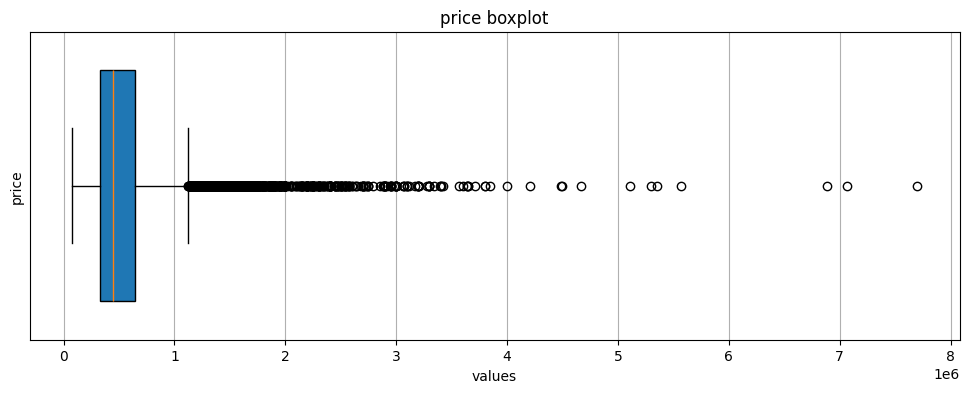

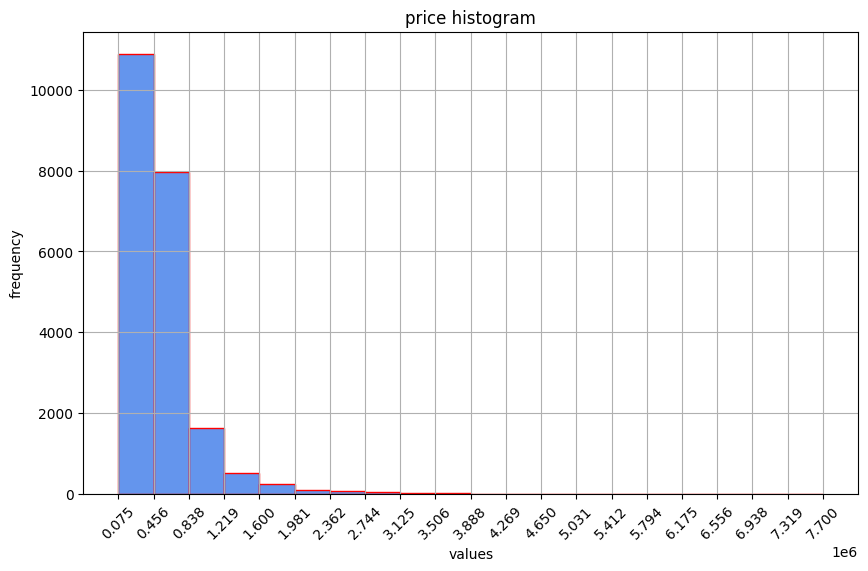

In [13]:
# price
feat = "price"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

# Remove outliers

In [14]:
# IQR method for outlier detection and removal
Q1 = np.percentile(data.price.to_numpy(), 25)
Q3 = np.percentile(data.price.to_numpy(), 75)
IQR = Q3 - Q1

# lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# mask to remove outliers from data
mask = (data.price>lower_bound) & (data.price<upper_bound)

In [15]:
# apply mask to data
data = data[mask].reset_index(drop=True)

# store data after removing outliers
file_to_store_path = dataset_path_full.parent.joinpath("dataset_removed_outliers.csv")
data.to_csv(file_to_store_path, sep=",", header=True, index=False)

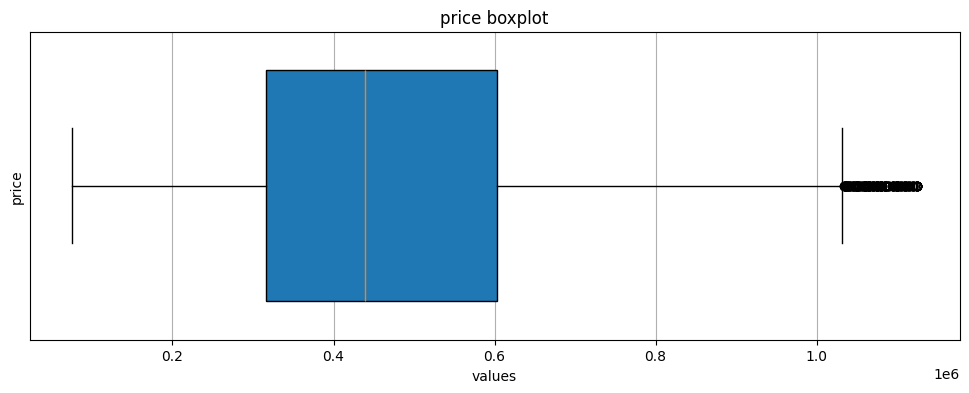

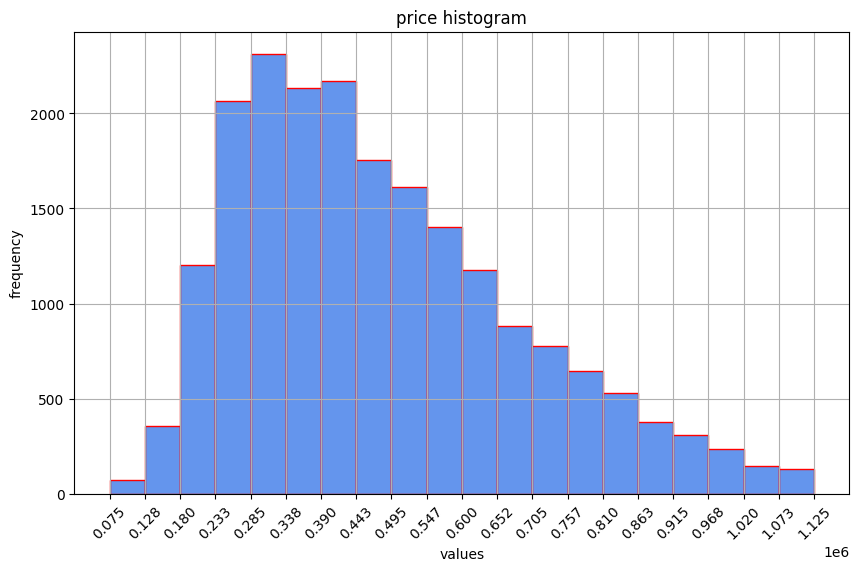

In [16]:
# price distribution after removing outliers
feat = "price"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

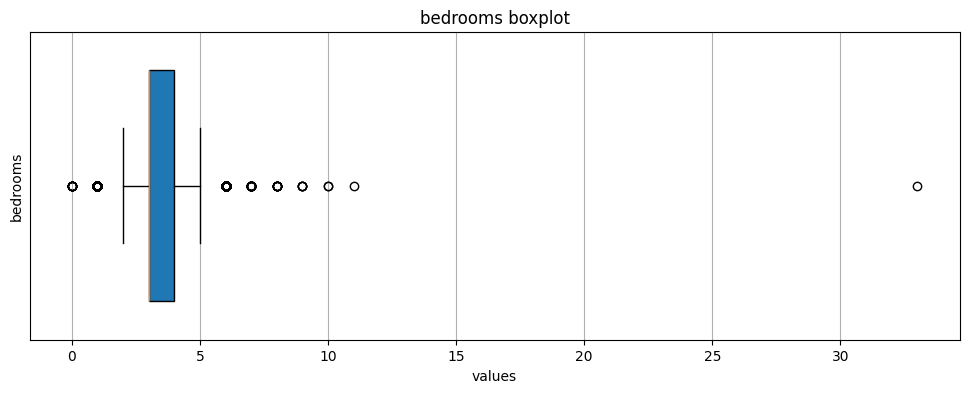

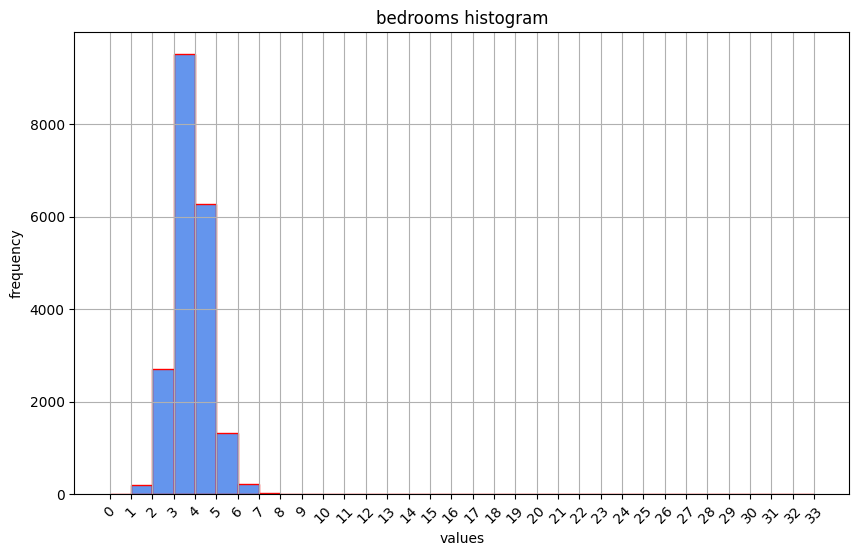

In [17]:
# bedrooms
feat = "bedrooms"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

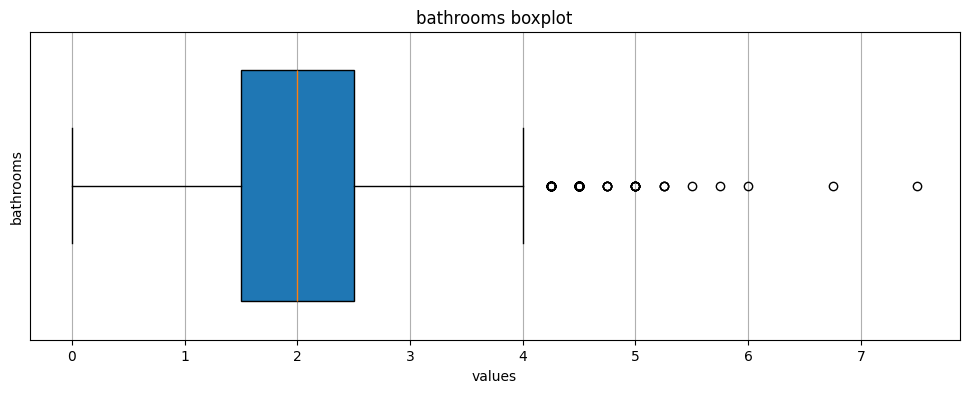

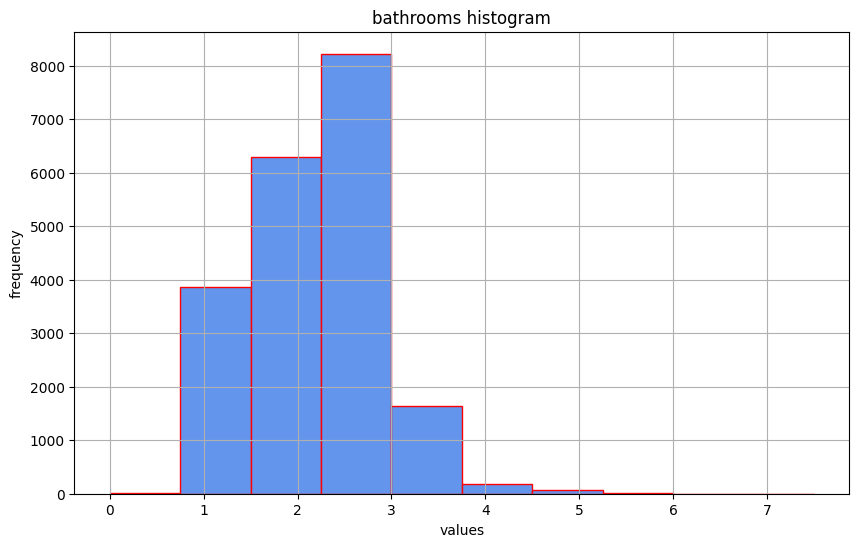

In [18]:
# bathrooms
feat = "bathrooms"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

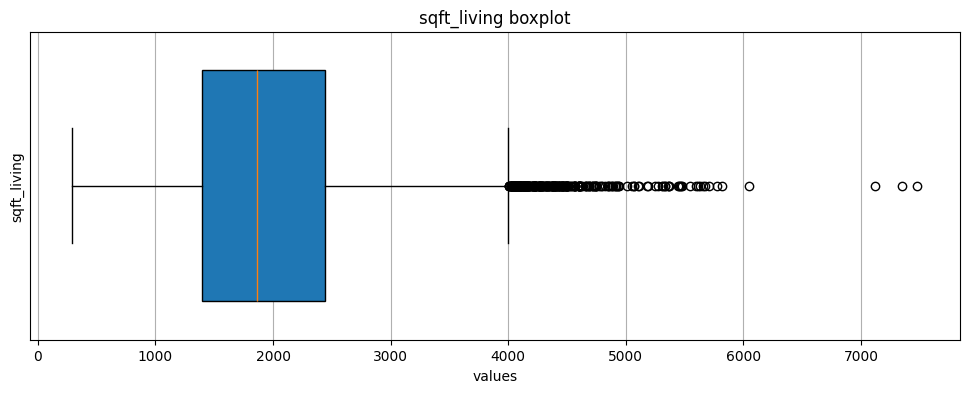

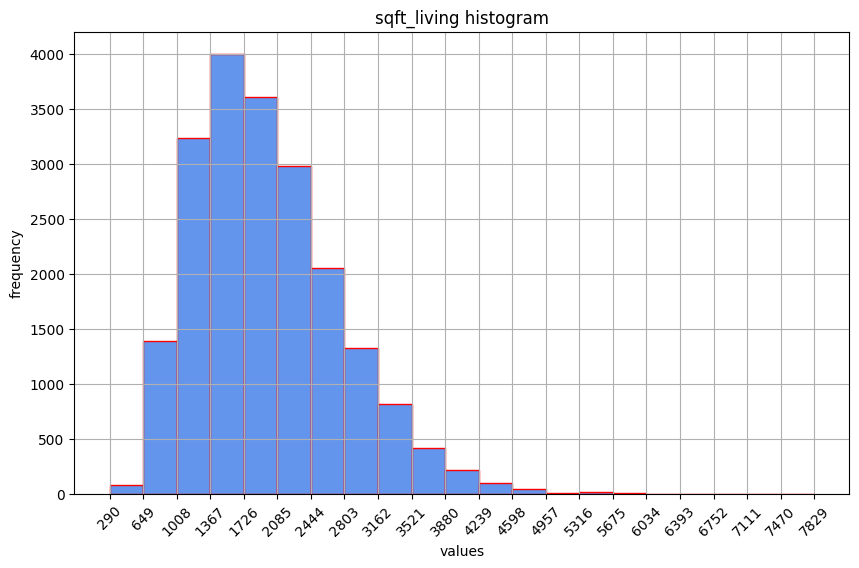

In [19]:
# sqft_living
feat = "sqft_living"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

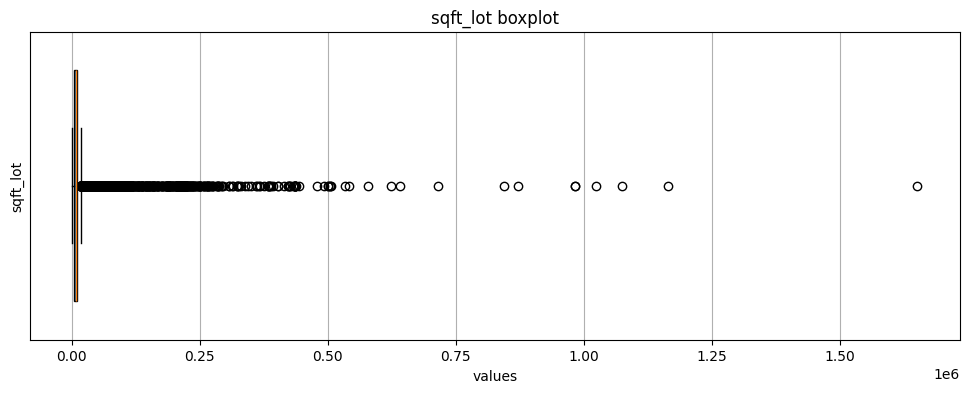

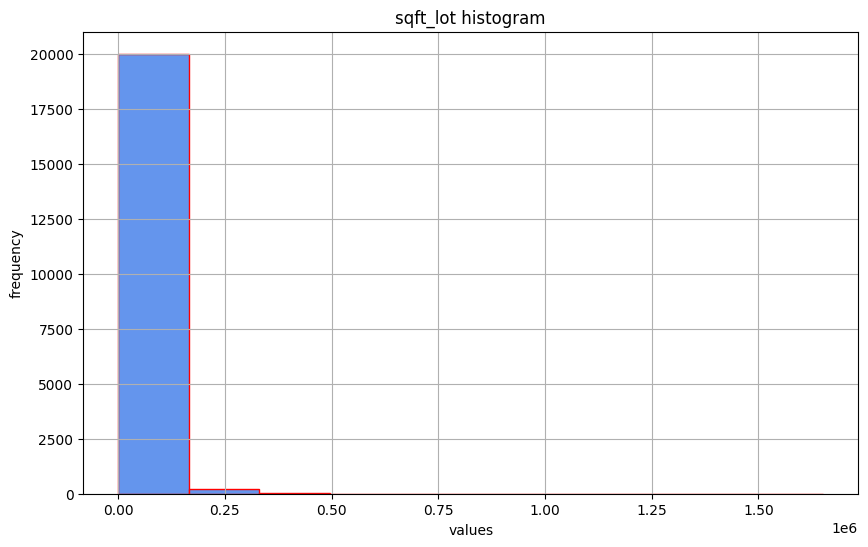

In [20]:
# sqft_lot
feat = "sqft_lot"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

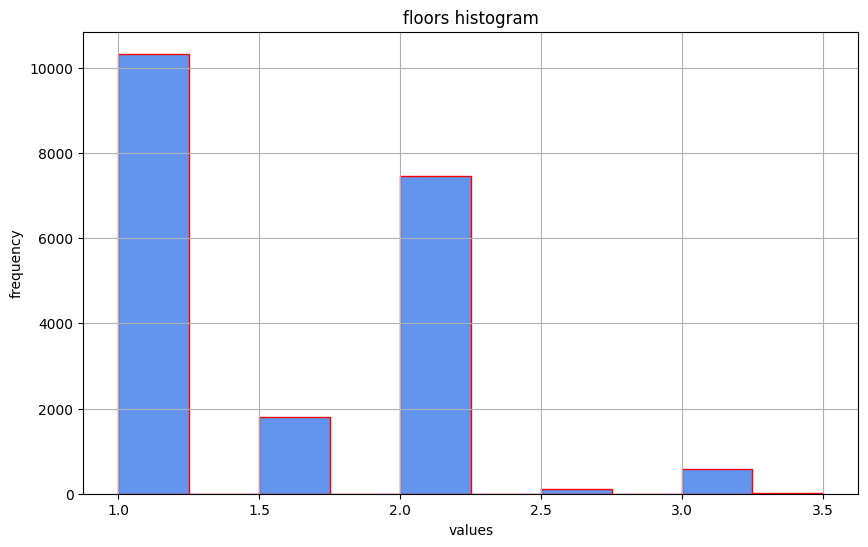

In [22]:
# floors
feat = "floors"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

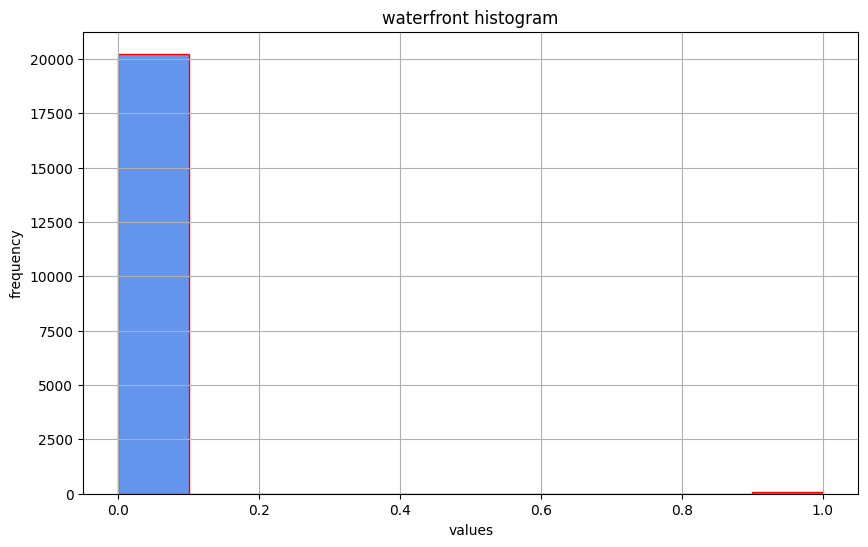

In [23]:
# waterfront
feat = "waterfront"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

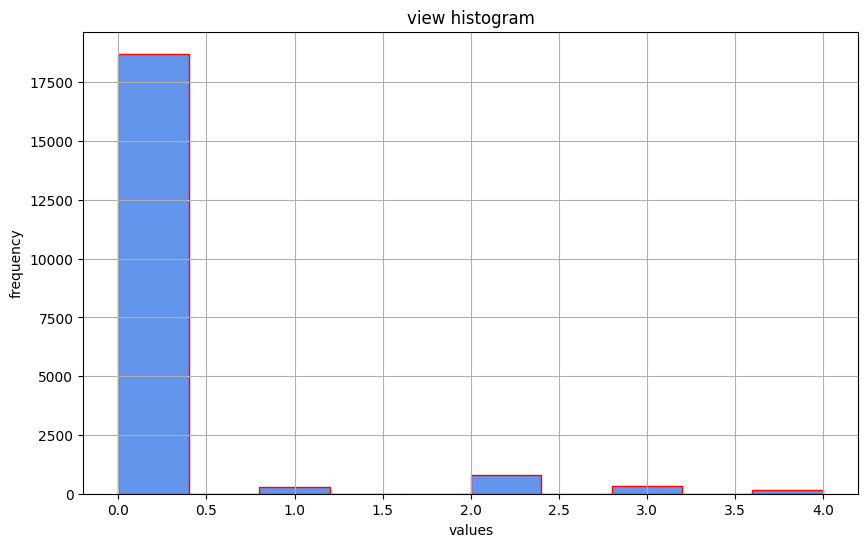

In [24]:
# view
feat = "view"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

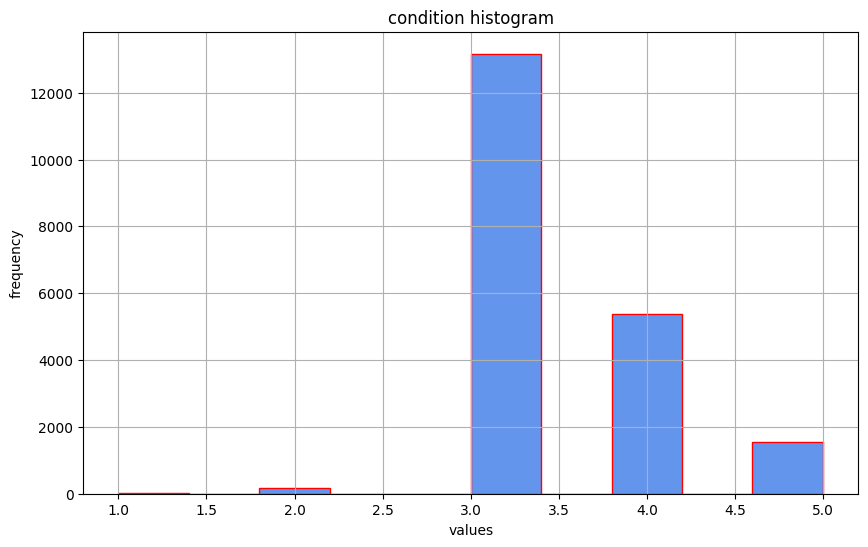

In [25]:
# condition
feat = "condition"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

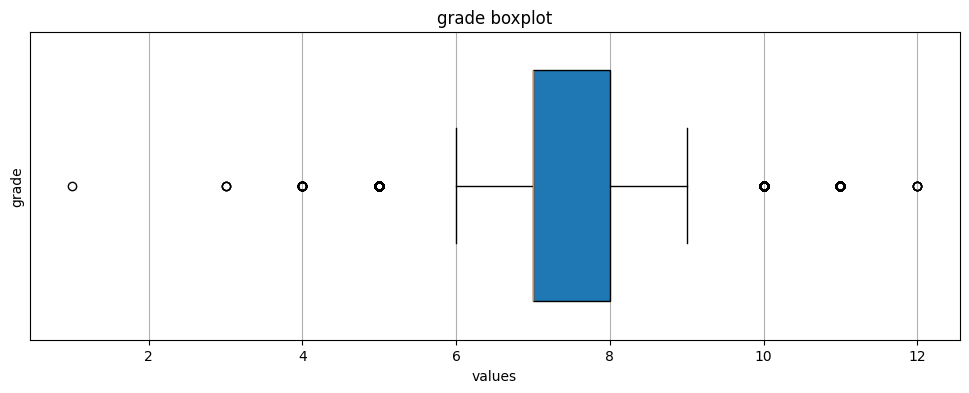

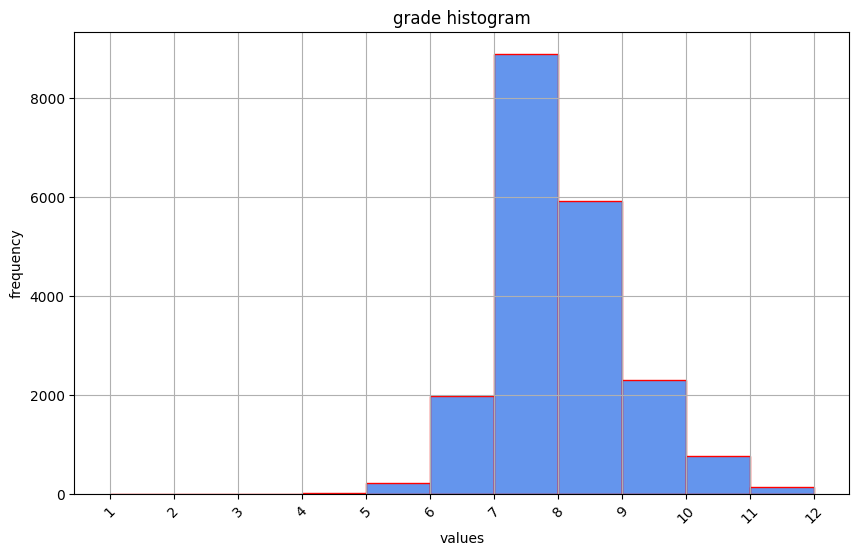

In [33]:
# grade
feat = "grade"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True, num_bins=10)

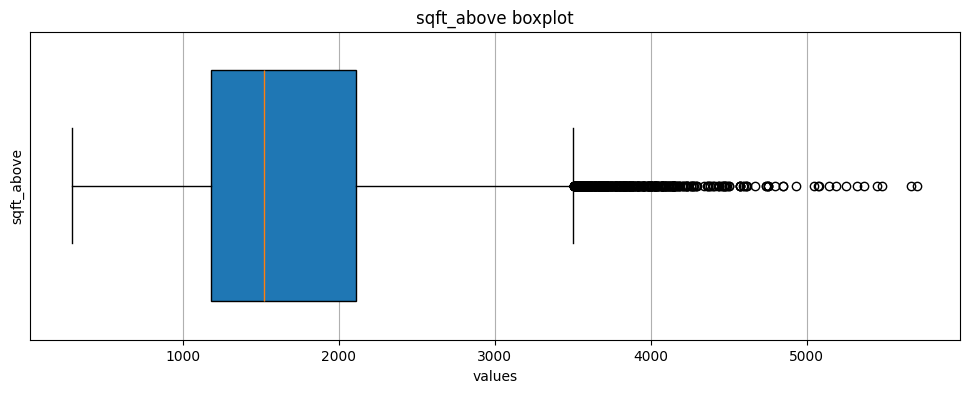

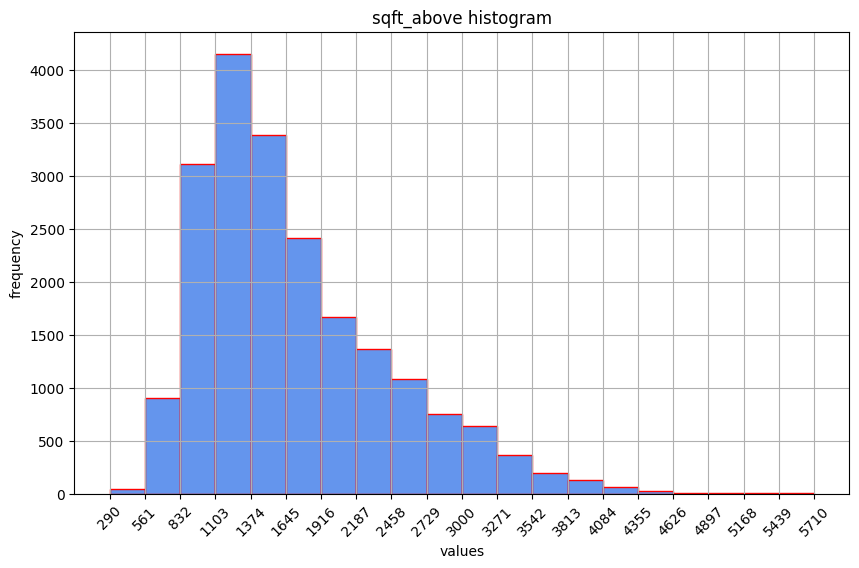

In [34]:
# sqft_above
feat = "sqft_above"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

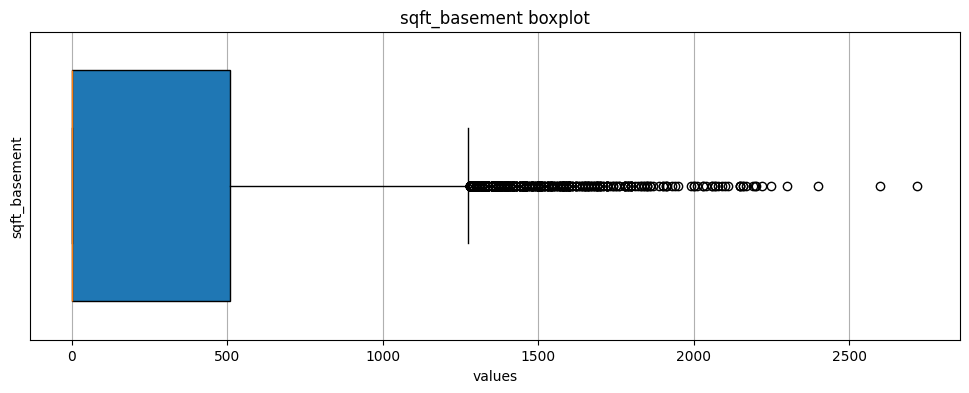

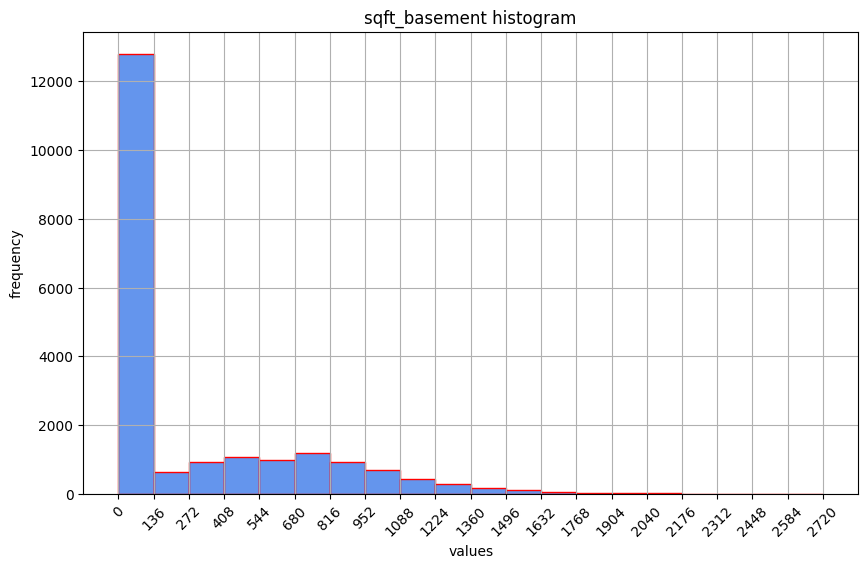

In [35]:
# sqft_basement
feat = "sqft_basement"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

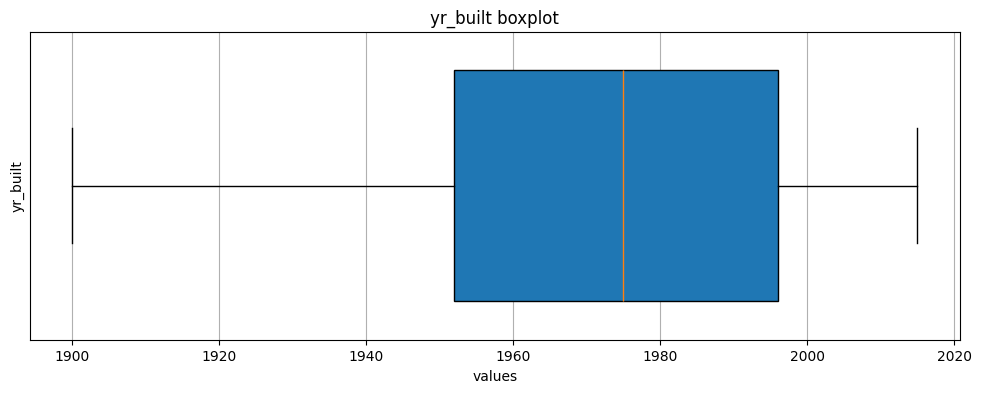

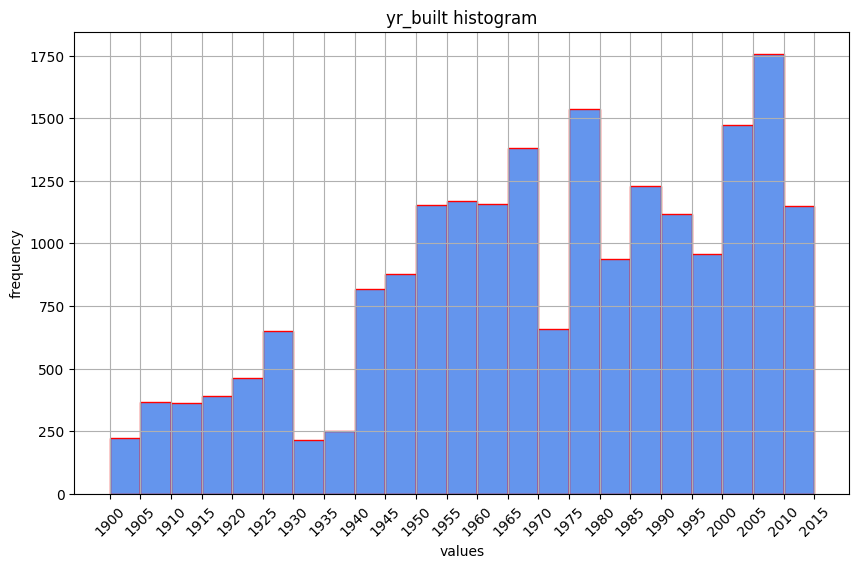

In [36]:
# yr_built
feat = "yr_built"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

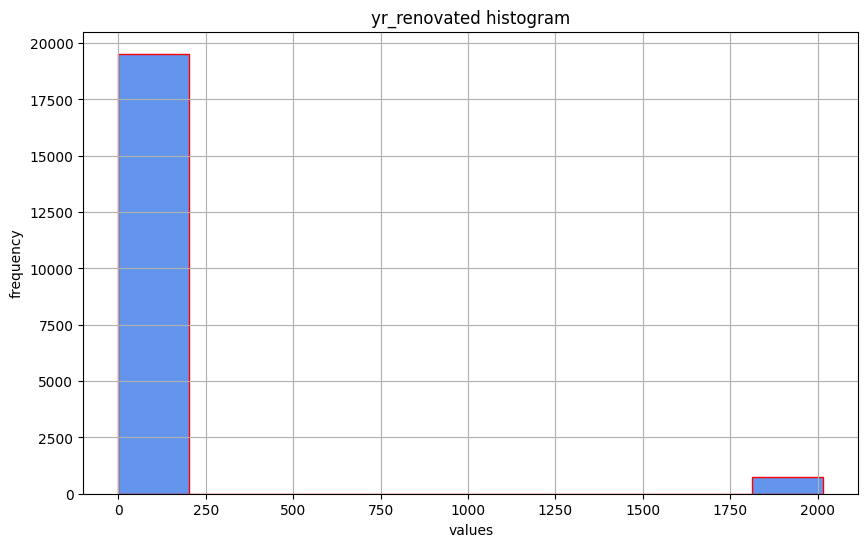

In [26]:
# yr_renovated
feat = "yr_renovated"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

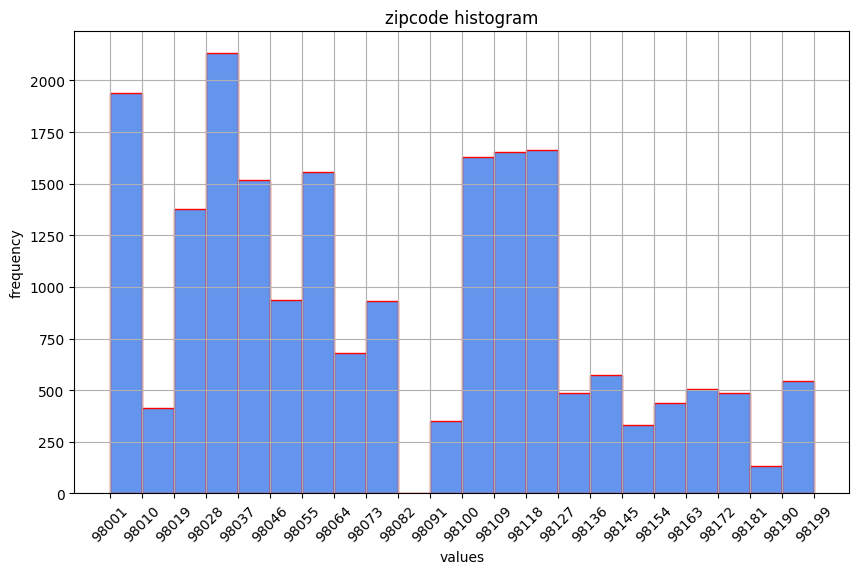

In [27]:
# zipcode
feat = "zipcode"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

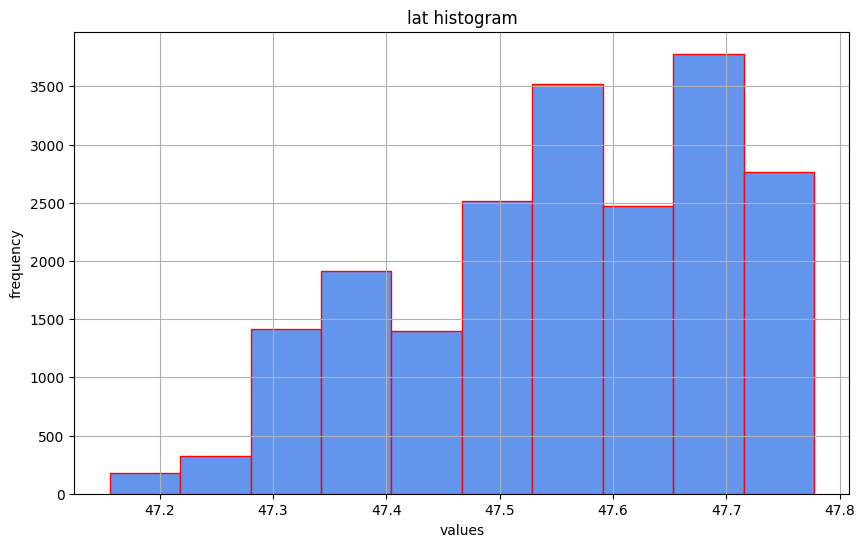

In [28]:
# lat
feat = "lat"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

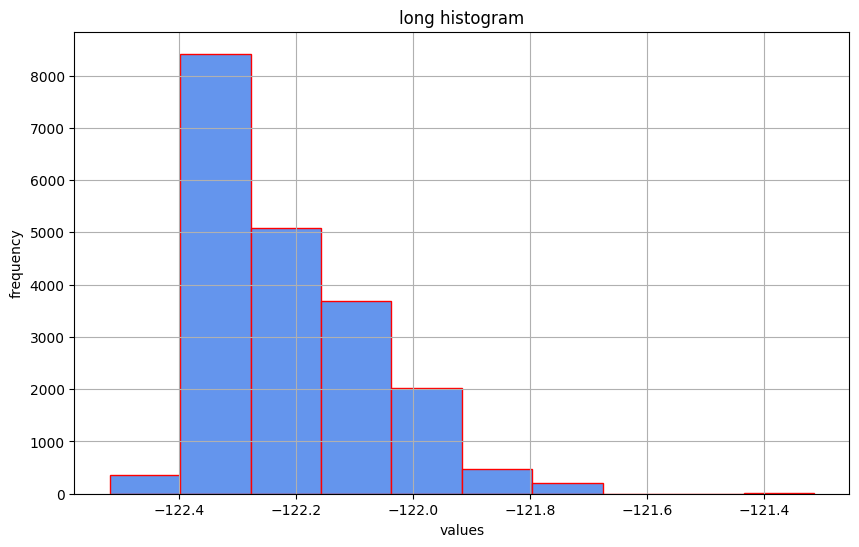

In [29]:
# long
feat = "long"
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram")

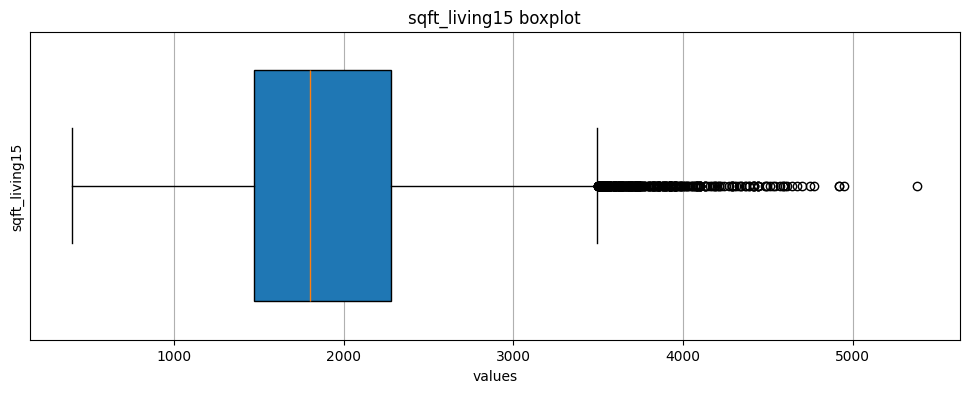

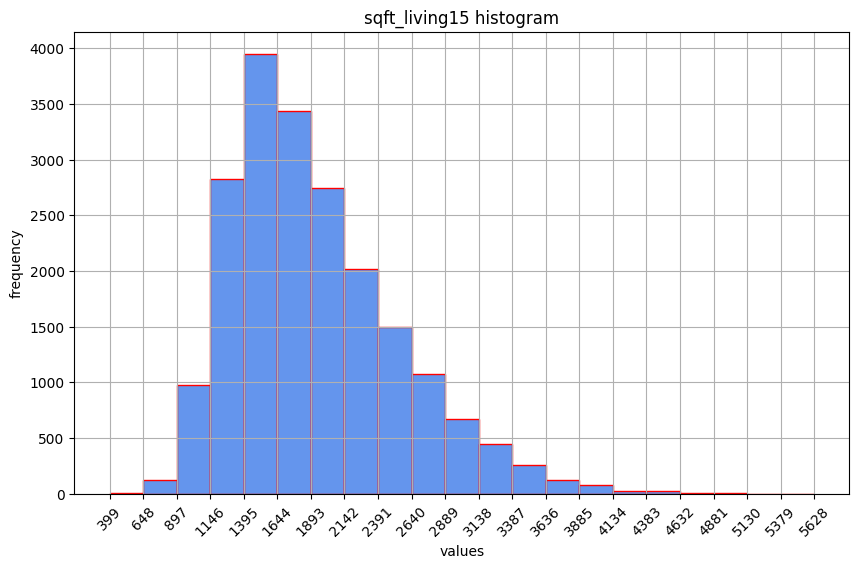

In [41]:
# sqft_living15
feat = "sqft_living15"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

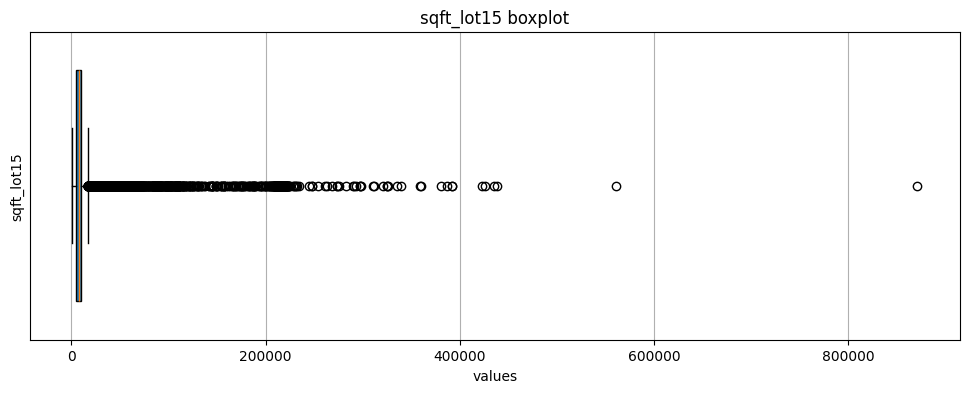

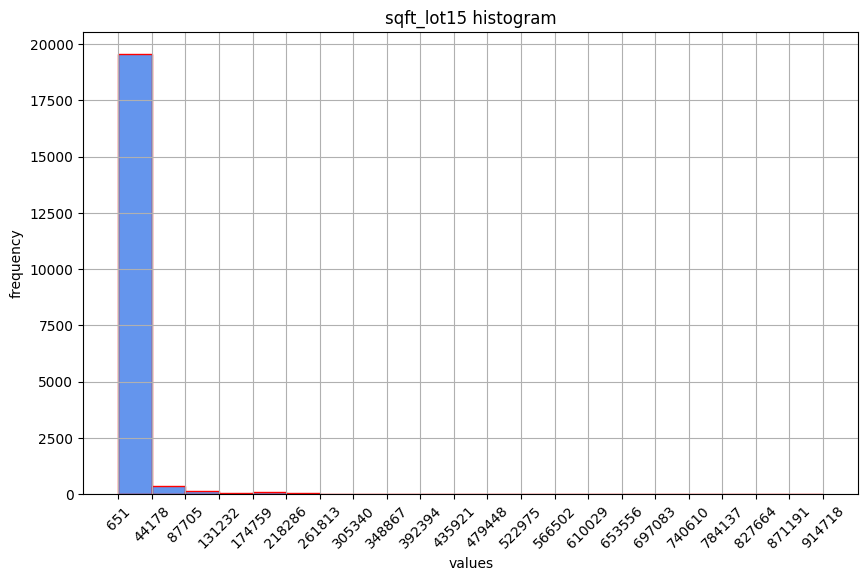

In [42]:
# sqft_lot15
feat = "sqft_lot15"
plot_boxplot(x=data[feat], xlabel="values", ylabel=feat, title=f"{feat} boxplot")
plot_histogram(x=data[feat], xlabel="values", ylabel="frequency", title=f"{feat} histogram", generate_bins=True)

## Correlation matrix of features

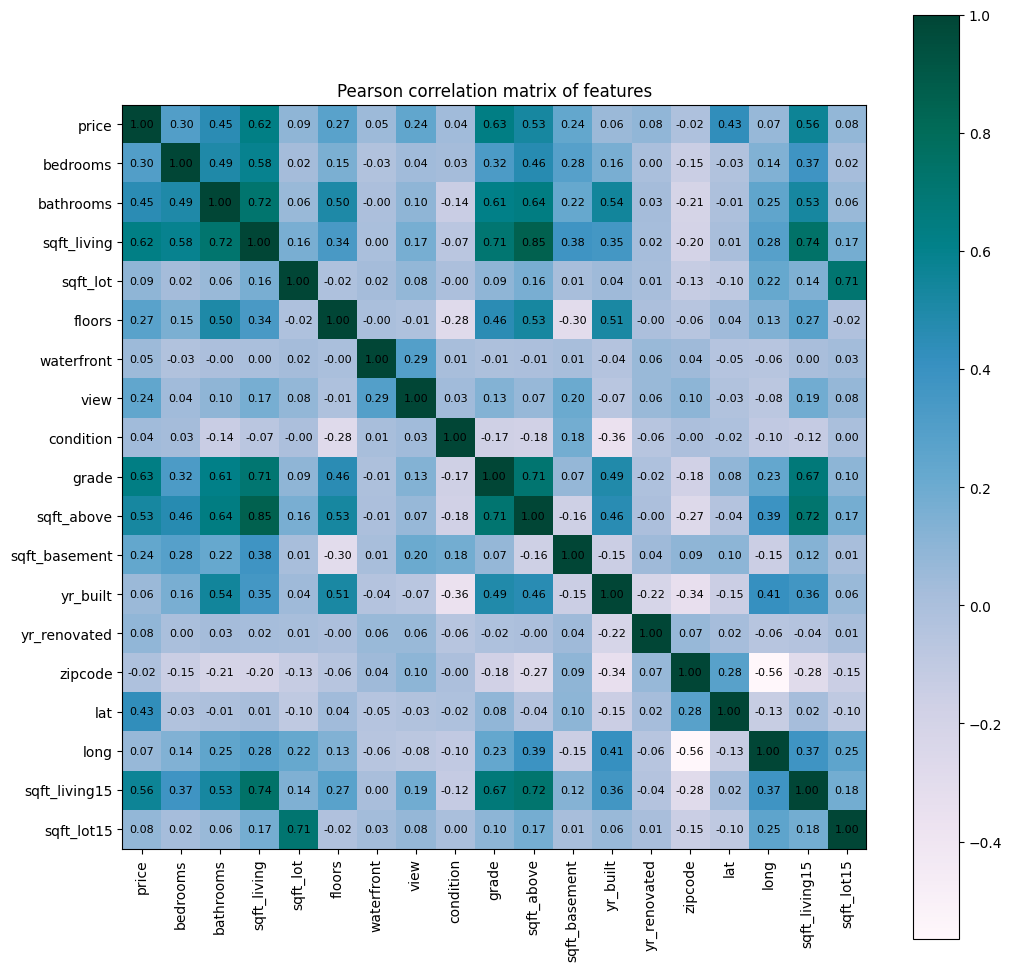

In [43]:
plot_correlaction_matrix(x=data[columns_for_analysis], feature_names=columns_for_analysis, title="Pearson correlation matrix of features")

## Plot price - sqft_living scatter plot

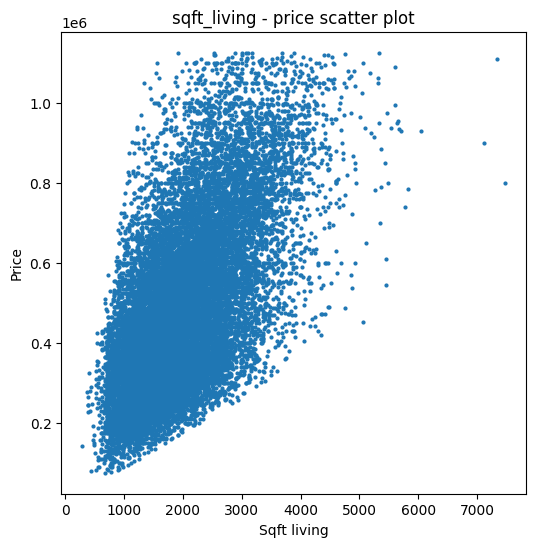

In [44]:
scatter_plot(
    x=data.sqft_living.to_numpy(),
    y=data.price.to_numpy(),
    xlabel="Sqft living",
    ylabel="Price",
    title="sqft_living - price scatter plot",
    marker_size=4,
    figsize=(6, 6),
)